Dropdown(description='Background Color:', index=3, options=('White', 'Red', 'Green', 'Blue', 'Yellow', 'Black'…

Button(button_style='success', description='Process Image', style=ButtonStyle())

Processing with Blue background...


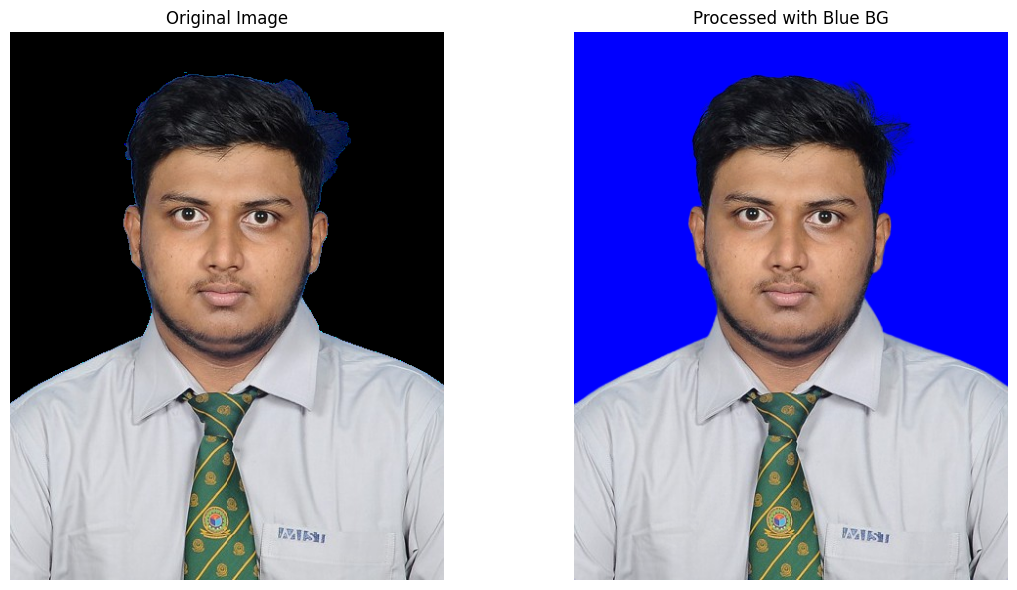

Download should start shortly...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
from google.colab import output
output.enable_custom_widget_manager()

# Imports
from google.colab import files
from PIL import Image
from rembg import remove
import io
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Predefined colors
color_options = {
    "White": (255, 255, 255),
    "Red": (255, 0, 0),
    "Green": (0, 255, 0),
    "Blue": (0, 0, 255),
    "Yellow": (255, 255, 0),
    "Black": (0, 0, 0),
    "Gray": (128, 128, 128)
}

# UI widgets
color_dropdown = widgets.Dropdown(
    options=color_options.keys(),
    value="White",
    description='Background Color:',
    style={'description_width': 'initial'}
)

process_button = widgets.Button(description="Process Image", button_style='success')

# Display dropdown and button
display(color_dropdown, process_button)

# Image path variables
input_path = None
output_path = "processed_image.jpg"

# Function to process image
def remove_background_and_add_color(input_path, output_path, bg_color):
    with open(input_path, "rb") as file:
        input_image = file.read()
    result = remove(input_image)
    image = Image.open(io.BytesIO(result)).convert("RGBA")
    color_bg = Image.new("RGBA", image.size, bg_color + (255,))
    final_image = Image.alpha_composite(color_bg, image).convert("RGB")
    final_image.save(output_path)
    return final_image

# Upload image
print("Please upload your image...")
uploaded = files.upload()
input_path = list(uploaded.keys())[0]

# Event handler when button is clicked
def on_button_click(b):
    clear_output(wait=True)
    display(color_dropdown, process_button)

    selected_color_name = color_dropdown.value
    bg_color = color_options[selected_color_name]

    print(f"Processing with {selected_color_name} background...")
    processed_image = remove_background_and_add_color(input_path, output_path, bg_color)

    # Show original and processed image
    original_image = Image.open(input_path).convert("RGB")
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(processed_image)
    plt.title(f"Processed with {selected_color_name} BG")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    print("Download should start shortly...")
    files.download(output_path)

# Connect button click to function
process_button.on_click(on_button_click)
